<a href="https://colab.research.google.com/github/emilia-uncc/IntroML/blob/main/assignment5/Assignment5_2_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable


#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/DataSets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [4]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
selected_columns_indices = [1, 2, 3, 4, 10]
print(selected_columns_indices)
X = housing.iloc[:, selected_columns_indices].values
#M = 1, E = 0
Y = housing.iloc[:, 0].values

[1, 2, 3, 4, 10]


In [6]:
np.random.seed(0)
#df_train = training set, #df_test = testset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [7]:
#scale dataset, inputs and outputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Fit the scaler on the data
#scaler.fit(Y_train.reshape(-1, 1))  # Reshape the 1D array to 2D (n_samples, n_features)
# Transform the data
#Y_train = scaler.transform(Y_train.reshape(-1, 1))

#scaler.fit(Y_test.reshape(-1, 1))
#Y_test = scaler.transform(Y_test.reshape(-1, 1))

print(X_train[0], X_test[0], Y_train[0], Y_test[0])


[-0.71677205 -1.29437561 -0.57330726 -0.93314164 -0.81914879] [-0.53893631  0.05251643 -0.57330726  0.21291401  0.32555914] 1750000 4585000


In [8]:
#linear model
def model_lin(t_u, w, b):
  return w*t_u +b

#loss calculation, t_p: predicted, t_c: ground truth
def loss_fn(t_p, t_c):
  squared_diffs = (t_p-t_c)**2
  return squared_diffs.mean()#return one value which is the mean value of the differenc tensor


# Create a PCA instance and specify the number of components to retain
from sklearn.decomposition import PCA
from sklearn import metrics

pca = PCA(n_components=1)
# Fit PCA on the scaled data and transform it
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [9]:
#define class with PyTorch for multidimensional model using neural network library
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out


In [10]:
#arrays into tensors
X_train_tensor =torch.tensor(X_train_pca, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)

Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

In [15]:
#set input and output dimensions
#inputDim = 5
#outputDim = 1
#set learning rate and epochs
learningRate = 0.1
epochs = 5000


#Adam  linear
#training with Adam optimizer, linear model
learning_rates = [0.05, 0.03, 0.08, 0.1] #higher learning rates give overflow

for learning_rate in learning_rates:

  params_SGD = torch.tensor([1.0,0.0], requires_grad = True)
  optimizer = optim.Adam([params_SGD], lr = learning_rate)



  test_losses = []
  train_losses = []
  for epoch in range(1, epochs +1):
    train_t_p = model_lin(X_train_tensor, *params_SGD) #calc output
    train_loss = loss_fn(train_t_p, Y_train_tensor) #calc loss

    with torch.no_grad():
      val_t_p = model_lin(X_test_tensor, *params_SGD)
      val_loss = loss_fn(val_t_p, Y_test_tensor)
      assert val_loss.requires_grad == False


    optimizer.zero_grad() # zero the gradients
    train_loss.backward() #calc gradients of the params
    optimizer.step() #calc the gradients

    if epoch % 500 == 0:
      print(f"Epoch: {epoch}, Train_Loss: {float(train_loss)}, Val_Loss: {float(val_loss)}")

    train_losses.append(train_loss.item())
    test_losses.append(val_loss.item())
  print(params_SGD)



Epoch: 500, Train_Loss: 26469740838912.0, Val_Loss: 25189005918208.0
Epoch: 1000, Train_Loss: 26469499666432.0, Val_Loss: 25188768940032.0
Epoch: 1500, Train_Loss: 26469260591104.0, Val_Loss: 25188536156160.0
Epoch: 2000, Train_Loss: 26469023612928.0, Val_Loss: 25188299177984.0
Epoch: 2500, Train_Loss: 26468786634752.0, Val_Loss: 25188062199808.0
Epoch: 3000, Train_Loss: 26468545462272.0, Val_Loss: 25187827318784.0
Epoch: 3500, Train_Loss: 26468306386944.0, Val_Loss: 25187590340608.0
Epoch: 4000, Train_Loss: 26468069408768.0, Val_Loss: 25187357556736.0
Epoch: 4500, Train_Loss: 26467828236288.0, Val_Loss: 25187120578560.0
Epoch: 5000, Train_Loss: 26467589160960.0, Val_Loss: 25186883600384.0
tensor([-8.1152e-02,  2.5001e+02], requires_grad=True)
Epoch: 500, Train_Loss: 26469839405056.0, Val_Loss: 25189104484352.0
Epoch: 1000, Train_Loss: 26469690507264.0, Val_Loss: 25188959780864.0
Epoch: 1500, Train_Loss: 26469549998080.0, Val_Loss: 25188815077376.0
Epoch: 2000, Train_Loss: 264694073917

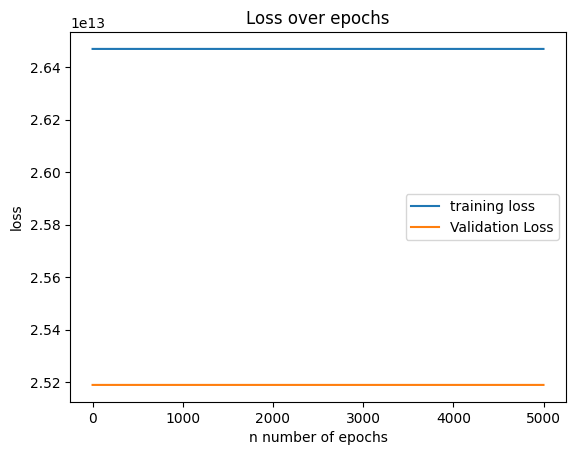

In [12]:
# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="training loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("n number of epochs")
plt.ylabel("loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [17]:
#SGD
#training with SGD optimizer, linear model
learning_rates = [0.0001, 0.001, 0.01, 0.1] #higher learning rates give overflow

for learning_rate in learning_rates:

  params_SGD = torch.tensor([1.0,0.0], requires_grad = True)
  optimizer = optim.SGD([params_SGD], lr = learning_rate)


  test_losses = []
  train_losses = []
  for epoch in range(1, epochs +1):
    train_t_p = model_lin(X_train_tensor, *params_SGD) #calc output
    train_loss = loss_fn(train_t_p, Y_train_tensor) #calc loss

    with torch.no_grad():
      val_t_p = model_lin(X_test_tensor, *params_SGD)
      val_loss = loss_fn(val_t_p, Y_test_tensor)
      assert val_loss.requires_grad == False


    optimizer.zero_grad() # zero the gradients
    train_loss.backward() #calc gradients of the params
    optimizer.step() #calc the gradients

    if epoch % 500 == 0:
      print(f"Epoch: {epoch}, Train_Loss: {float(train_loss)}, Val_Loss: {float(val_loss)}")

    train_losses.append(train_loss.item())
    test_losses.append(val_loss.item())
  print(params_SGD)

Epoch: 500, Train_Loss: 22339469180928.0, Val_Loss: 21108227047424.0
Epoch: 1000, Train_Loss: 18950280708096.0, Val_Loss: 17763917627392.0
Epoch: 1500, Train_Loss: 16175508488192.0, Val_Loss: 15029752561664.0
Epoch: 2000, Train_Loss: 13903761244160.0, Val_Loss: 12794747420672.0
Epoch: 2500, Train_Loss: 12043852709888.0, Val_Loss: 10968086085632.0
Epoch: 3000, Train_Loss: 10521115885568.0, Val_Loss: 9475428712448.0
Epoch: 3500, Train_Loss: 9274428227584.0, Val_Loss: 8255960514560.0
Epoch: 4000, Train_Loss: 8253746446336.0, Val_Loss: 7259906637824.0
Epoch: 4500, Train_Loss: 7418095861760.0, Val_Loss: 6446540390400.0
Epoch: 5000, Train_Loss: 6733941964800.0, Val_Loss: 5782550609920.0
tensor([1.4888e-01, 3.0202e+06], requires_grad=True)
Epoch: 500, Train_Loss: 6739507281920.0, Val_Loss: 5787942912000.0
Epoch: 1000, Train_Loss: 4062248173568.0, Val_Loss: 3232041795584.0
Epoch: 1500, Train_Loss: 3700648837120.0, Val_Loss: 2915042590720.0
Epoch: 2000, Train_Loss: 3651808264192.0, Val_Loss: 28